In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
events_corner = np.loadtxt("../data_processed/events_corner.txt")
events = np.loadtxt("../data/events.txt")

In [52]:
time_range = [2.5, 2.6]
idx_range = [np.searchsorted(events[:,0], time_range[0]), np.searchsorted(events[:,0], time_range[1])]
events_time = events[idx_range[0]:idx_range[1], :]
events_corner_time = events_corner[idx_range[0]:idx_range[1]]

In [53]:
def img_from_events(events, events_corner, check_corner=True):
    img_height = int(events[:,2].max()+1)
    img_width = int(events[:,1].max()+1)
    img = np.zeros((img_height, img_width))
    for i, e in enumerate(events):
        if e[3] == 1:
            continue
        if check_corner and events_corner[i] == 0:
            continue
        x = int(e[1])
        y = int(e[2])
        img[y, x] += 1
    return img

In [54]:
img = img_from_events(events_time, events_corner_time, check_corner=True)

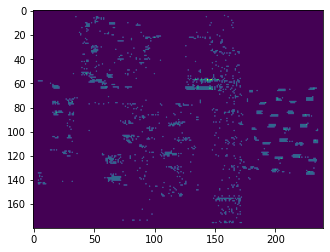

In [55]:
plt.imshow(img)

In [56]:
events_corner_filtered = events_time[events_corner_time == 1]

In [57]:
events_corner_filtered.shape

(4071, 4)

In [58]:
np.savetxt("../data_processed/events_corner_filt.txt", events_corner_filtered)